## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
boston = datasets.load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\Users\BrunodaCunhaPeixoto\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo a árvore de profundidade 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# Definindo a árvore de profundidade 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_8 = tree_max_depth_8.predict(X_test)
y_pred_2 = tree_max_depth_2.predict(X_test)

In [4]:
# Calculando o MSE das árvores
mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f'Erro quadrático médio (MSE) com profundidade 8: {mse_8}')
print(f'Erro quadrático médio (MSE) com profundidade 2: {mse_2}')

Erro quadrático médio (MSE) com profundidade 8: 8.978508612023766
Erro quadrático médio (MSE) com profundidade 2: 25.993190895971196


In [5]:
# Plotar a árvore de decisão
plt.figure(figsize=(200,200))
plot_tree(tree_max_depth_8, feature_names=X_train.columns, filled=True, rounded=True, fontsize=20)
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
path = tree_max_depth_8.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([0.00000000e+00, 1.23762376e-05, 1.98019802e-04, 3.09405941e-04,
        3.09405941e-04, 4.45544554e-04, 8.91089109e-04, 1.00247525e-03,
        1.23762376e-03, 1.23762376e-03, 1.49752475e-03, 1.49752475e-03,
        1.78217822e-03, 2.00495050e-03, 2.09158416e-03, 2.23391089e-03,
        3.00742574e-03, 5.45792079e-03, 6.54702970e-03, 1.11386139e-02,
        1.16027228e-02, 1.18364961e-02, 1.22297855e-02, 1.22297855e-02,
        1.32626513e-02, 1.88127063e-02, 2.07962046e-02, 2.17256011e-02,
        2.34499450e-02, 2.44018152e-02, 2.45513614e-02, 2.67337046e-02,
        2.69441694e-02, 3.33459060e-02, 3.66893564e-02, 3.98526752e-02,
        4.10086634e-02, 4.33069307e-02, 4.33426155e-02, 4.74107007e-02,
        5.26773927e-02, 5.37304730e-02, 5.82485402e-02, 6.31703795e-02,
        6.65387789e-02, 6.77722772e-02, 6.89306931e-02, 7.11955961e-02,
        7.85940594e-02, 8.20173267e-02, 8.26550670e-02, 8.42838284e-02,
        8.68193878e-02, 9.03564356e-02, 9.18170559

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
# Treinar árvores usando diferentes alphas
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [21]:
train_mses = [mean_squared_error(y_train, tree.predict(X_train)) for tree in trees]
test_mses = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

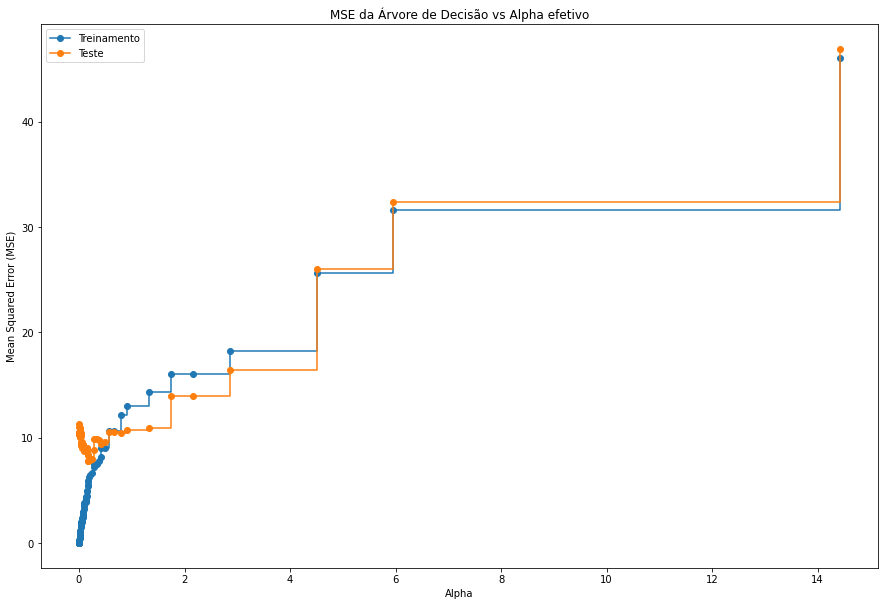

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(ccp_alphas[:-1], train_mses[:-1], marker='o', label="Treinamento", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], test_mses[:-1], marker='o', label="Teste", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE da Árvore de Decisão vs Alpha efetivo")
plt.legend()
plt.show()

In [25]:
# Escolher o valor de alpha próximo ao ponto de mínimo do MSE
min_test_mse_index = test_mses.index(min(test_mses))
melhor_alpha = ccp_alphas[min_test_mse_index]
print(f"O melhor valor de alpha é {melhor_alpha} com MSE de {min(test_mses)}")

O melhor valor de alpha é 0.17329304180417732 com MSE de 7.760511357717734


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [28]:
from sklearn.metrics import r2_score

# Treinar a árvore com o melhor valor de alpha
melhor_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=melhor_alpha)
melhor_tree.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = melhor_tree.predict(X_test)

# Calcular o R² no conjunto de teste
r2 = r2_score(y_test, y_pred)
print(f"O R-quadrado da árvore de decisão com ccp_alpha={melhor_alpha:.2f} é {r2:.2f}")

O R-quadrado da árvore de decisão com ccp_alpha=0.17 é 0.89


### 7. Visualize esta árvore.

In [29]:
# Plotar a árvore de decisão
plt.figure(figsize=(200,200))
plot_tree(melhor_tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=20)
plt.show()